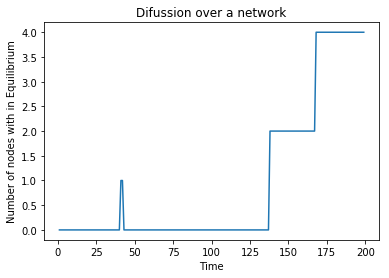

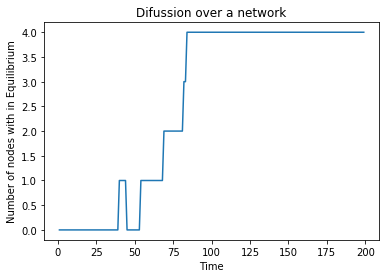

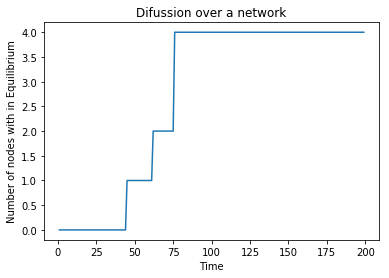

In [3]:
import networkx as nx
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
from pylab import *
import random


def nodes_connected(G,u, v):
    return u in G.neighbors(v)

def generalisedLapMatrix(G,x):
    nodelist = nx.nodes(G)
    nsize = len(nodelist)
    mp    = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        c = 0   
        i = nodelist.index(n)
        j = i+1
        for m in nodelist[j:]:
            if(nodes_connected(G,n,m)):
                mp[i,j]= mp[j,i] = -1
            else:
                s   = nx.shortest_path_length(G, source=n,target=m)
                val = (s*pow(x,(s-1)))
                mp[i,j]= mp[j,i]= -val
            j= j+1
        mp[i,i] =  -1*(mp[i].sum())
        i = 0
    return mp

matrix_lst = []
G = nx.Graph()
edgelst=[(1,2),(2,3),(3,4)]
G.add_edges_from(edgelst)
L  = nx.laplacian_matrix(G).todense()

matrix_lst.append(L)
for x in arange(0.1,0.3,0.1):
    l = generalisedLapMatrix(G,x)
    matrix_lst.append(l)
    
phi_0 = [0.3,0.0,0.8,0.0] 
avg = np.average(phi_0)

val=[]
for l_x in matrix_lst:
    c_list =[]
    for t in range(1,200):
        c = 0
        phi_t = np.dot(phi_0, expm(-l_x*t*0.05))
        val.append(phi_t)
        for n in phi_t:
            if(avg-0.0001<= n <= avg+0.0001):
                c= c+1
        c_list.append(c)
        
    plt.plot(range(1,200),c_list) 
    plt.title("Difussion over a network")
    plt.xlabel("Time")
    plt.ylabel("Number of nodes with in Equilibrium")
    plt.show()

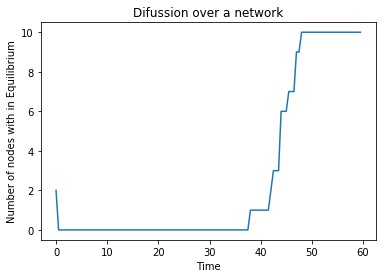

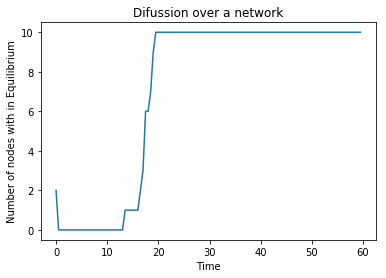

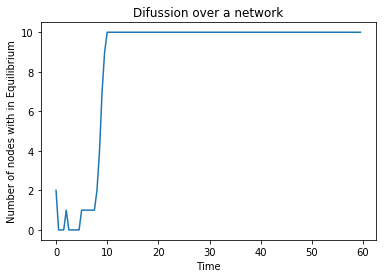

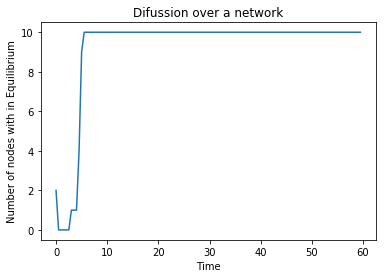

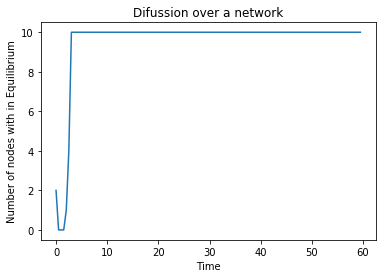

In [8]:
import networkx as nx
import numpy as np
from pylab import *

matrix_lst = []
G = nx.Graph()
edgelst=[(1,3),(2,3),(3,4),(3,5),(4,6),(5,7),(7,8),(8,9),(5,8),(9,10)]
G.add_edges_from(edgelst)
L   = nx.laplacian_matrix(G).todense()

matrix_lst.append(L)
for x in arange(0.1,0.5,0.1):
    l = generalisedLapMatrix(G,x)
    matrix_lst.append(l)
    
phi_0 = [3,0.0,8,0,5,2,0,0.0,0,2] 
avg   = np.average(phi_0)

val=[]
for l_x in matrix_lst:
    c_list =[]
    for t in np.arange(0,60,0.5):
        c = 0
        phi_t = np.dot(phi_0, expm(-l_x*t*1))
        for n in phi_t:
            if(avg-0.0001<= n <= avg+0.0001):
                c= c+1
        c_list.append(c)
    val.append(c_list)
        
    plt.plot(np.arange(0,60,0.5),c_list) 
    plt.title("Difussion over a network")
    plt.xlabel("Time")
    plt.ylabel("Number of nodes with in Equilibrium")
    plt.show()
    
#plt.plot(range(1,800),val[0], range(1,800),val[1],range(1,800),val[2], range(1,800),val[3],range(1,800),val[4]) 
#plt.legend(['x=0', 'x=0.1', 'x=0.2', 'x=0.3', 'x=0.4'], loc='lower right')
#plt.show()

In [51]:
phi_0

[3, 8, 4, 9, 8, 4, 1, 0, 8, 6, 7, 8, 3, 0, 7, 10, 10, 5, 1, 6]

In [46]:
def nodes_connected(u, v):
    return u in G.neighbors(v)


def generalisedLapMatrix(G,x):
    nodelist = nx.nodes(G)
    nsize = len(nodelist)
    mp = np.zeros(shape=(nsize,nsize))
    i = 1
    for n in nodelist:
        c = 0
        for m in nodelist[i:]:
            if(nodes_connected(n,m)):
                mp[n-1,m-1]= mp[m-1,n-1]= -1
                c = c+1
            else:
                s   = nx.shortest_path_length(G, source=n,target=m)
                val = (s*pow(x,(s-1)))
                mp[n-1,m-1]= mp[m-1,n-1]= -val
                c = c+val
        mp[n-1,n-1] =  c
        i = i+1
    return mp

G = nx.Graph()
elst = [(1,2),(2,3),(3,4)]
G.add_edges_from(elst)
a =generalisedLapMatrix(G,0.2)
print(expm(-a*1*0.5))

[[ 0.55511747  0.30524107  0.21055668  0.13116586]
 [ 0.30524107  0.66818097  0.38546109  0.27003345]
 [ 0.21055668  0.38546109  0.8130072   0.47732851]
 [ 0.13116586  0.27003345  0.47732851  1.14728716]]


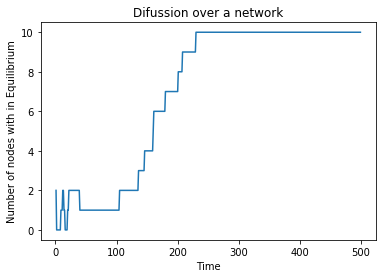

In [16]:
G = nx.Graph()
edgelst=[(1,3),(2,3),(3,4),(3,5),(4,6),(5,7),(7,8),(8,9),(5,8),(9,10)]
G.add_edges_from(edgelst)
nodes = G.nodes()
L   = nx.laplacian_matrix(G).todense()
phi_0 = [0.3,0.0,0.8,0,0.5,0.2,0,0.0,0,0.2] 

avg = np.average(phi_0)

c_list =[]
for t in range(1,500):
    c = 0
    phi_t = np.dot(phi_0, expm(-L*t*0.05))
    for n in phi_t:
        if(avg-0.01<= n <= avg+0.01):
            c= c+1
    c_list.append(c)
plt.plot(range(1,500),c_list) 
plt.title("Difussion over a network")
plt.xlabel("Time")
plt.ylabel("Number of nodes with in Equilibrium")
plt.show()


In [72]:
G = nx.Graph()
edgelst=[(1,2),(2,3),(3,4)]
G.add_edges_from(edgelst)
nodes = G.nodes()
L  = nx.laplacian_matrix(G).todense()
print(L)
phi_0 = [0.3,0.0,0.8,0.0] 

avg = np.average(phi_0)
print(avg)
c_list =[]
for t in range(1,500):
    c = 0
    phi_t = np.dot(phi_0, expm(-L*t*0.05))
    for n in phi_t:
        if(avg-0.01<= n <= avg+0.01):
            c= c+1
    c_list.append(c)
#plt.plot(range(1,500),c_list) 
#plt.title("Difussion over a network")
#plt.xlabel("Time")
#plt.ylabel("Number of nodes with in Equilibrium")
#plt.show()

[[ 1 -1  0  0]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [ 0  0 -1  1]]
0.275


In [15]:
G = nx.Graph()
edgelst=[(1,2),(2,3),(3,4)]
G.add_edges_from(edgelst)
nodes = G.nodes()
L  = generalisedLapMatrix(G, 0.1)
phi_0 = [0.3,0.0,0.8,0.0] 

avg = np.average(phi_0)
print(avg)
c_list =[]
for t in range(1,500):
    c = 0
    phi_t = np.dot(phi_0, expm(-L*t*0.05)
    for n in phi_t:
        if(avg-0.01<= n <= avg+0.01):
            c= c+1
    c_list.append(c)

SyntaxError: invalid syntax (<ipython-input-15-e5c7c1269059>, line 14)

In [7]:
import numpy as np

def nodes_connected(G,u, v):
    return u in G.neighbors(v)

def generalisedLapMatrix(G,x):
    nodelist = nx.nodes(G)
    nsize = len(nodelist)
    mp    = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        c = 0   
        i = nodelist.index(n)
        j = i+1
        for m in nodelist[j:]:
            if(nodes_connected(G,n,m)):
                mp[i,j]= mp[j,i] = -1
            else:
                s   = nx.shortest_path_length(G, source=n,target=m)
                val = (s*pow(x,(s-1)))
                mp[i,j]= mp[j,i]= -val
            j= j+1
        mp[i,i] =  -1* (mp[i].sum())
        i = 0
    return mp

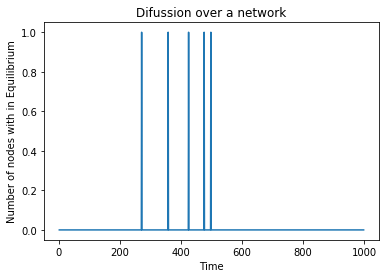

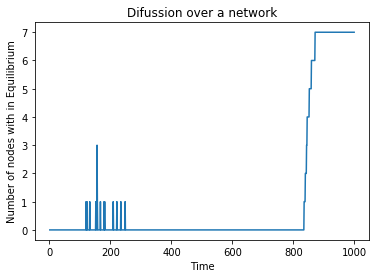

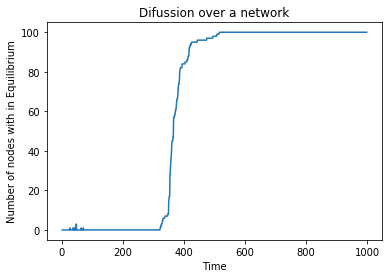

In [22]:
import networkx as nx
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
from pylab import *
import random


def nodes_connected(G,u, v):
    return u in G.neighbors(v)

def generalisedLapMatrix(G,x):
    nodelist = nx.nodes(G)
    nsize = len(nodelist)
    mp    = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        c = 0   
        i = nodelist.index(n)
        j = i+1
        for m in nodelist[j:]:
            if(nodes_connected(G,n,m)):
                mp[i,j]= mp[j,i] = -1
            else:
                s   = nx.shortest_path_length(G, source=n,target=m)
                val = (s*pow(x,(s-1)))
                mp[i,j]= mp[j,i]= -val
            j= j+1
        mp[i,i] =  -1*(mp[i].sum())
        i = 0
    return mp

matrix_lst = []
n = 100
G = nx.barabasi_albert_graph(n, 1, seed=None)
L = nx.laplacian_matrix(G).todense()

phi_0 = []
for l in range(0,100):
    phi_0.append(random.randint(0, 10))

avg = np.average(phi_0)

matrix_lst.append(L)
for x in arange(0.1,0.3,0.1):
    l = generalisedLapMatrix(G,x)
    matrix_lst.append(l)
    
#val=[]
for l_x in matrix_lst:
    c_list =[]
    for t in range(1,1000):
        c = 0
        phi_t = np.dot(phi_0, expm(-l_x*t*0.05))
        for n in phi_t:
            if(avg-0.0001<= n <= avg+0.0001):
                c= c+1
        c_list.append(c)
        
    plt.plot(range(1,1000),c_list) 
    plt.title("Difussion over a network")
    plt.xlabel("Time")
    plt.ylabel("Number of nodes with in Equilibrium")
    plt.show()

In [8]:
import networkx as nx
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
from pylab import *
import random


def diffusion2(G,phi_0,T,s,x_vals,markers):

    def nodes_connected(G,u, v):
        return u in G.neighbors(v)

    def generalisedLapMatrix(G,x):
        nodelist = nx.nodes(G)
        nsize = len(nodelist)
        mp    = np.zeros(shape=(nsize,nsize))
        for n in nodelist:
            c = 0   
            i = nodelist.index(n)
            j = i+1
            for m in nodelist[j:]:
                if(nodes_connected(G,n,m)):
                    mp[i,j]= mp[j,i] = -1
                else:
                    s   = nx.shortest_path_length(G, source=n,target=m)
                    val = (s*pow(x,(s-1)))
                    mp[i,j]= mp[j,i]= -val
                j= j+1
            mp[i,i] =  -1*(mp[i].sum())
            i = 0
        return mp

    matrix_lst = []
    L  = nx.laplacian_matrix(G).todense()

    matrix_lst.append(L)
    for x in x_vals:
        l = generalisedLapMatrix(G,x)
        matrix_lst.append(l)

    avg = np.average(phi_0)

    val=[]
    for l_x in matrix_lst:
        c_list =[]
        for t in np.arange(0,T,s):
            c = 0
            phi_t = np.dot(phi_0, expm(-l_x*t*1))
            for n in phi_t:
                if(avg-0.0001<= n <= avg+0.0001):
                    c= c+1
            c_list.append(c)
        val.append(c_list)
        
    for j in range(0, len(x_vals)+1):
        plt.plot(np.arange(0,T,s),val[j], marker=markers[j]) 
    plt.title("Diffusion over a network")
    plt.xlabel("Time")
    plt.ylabel("Number of nodes with in Equilibrium")
    plt.show()
    return True

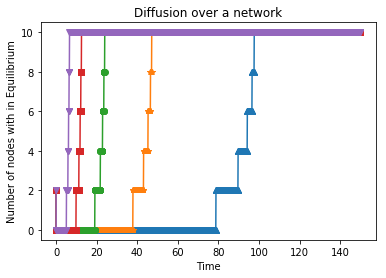

True

In [30]:
#path network

x_vals = [0.1,0.2,0.3,0.4]
markers = ['^','*','o','s','v']
T = 150
s = 0.05

G = nx.Graph()
edgelst=[(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)]
G.add_edges_from(edgelst)
phi_0 = [3,0.0,8,0,5,2,0,0.0,0,2] 

diffusion(G,phi_0,T,s,x_vals,markers)

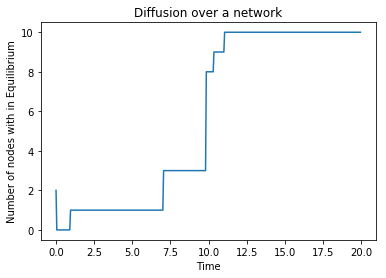

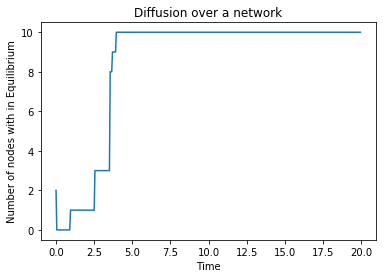

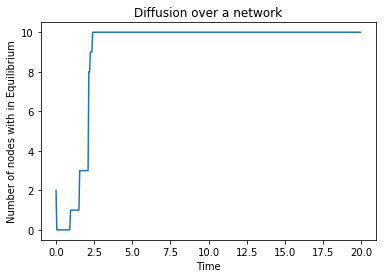

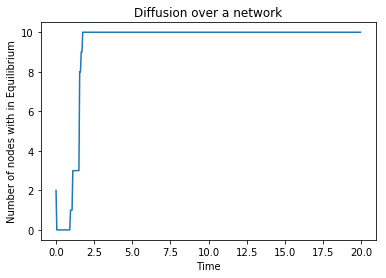

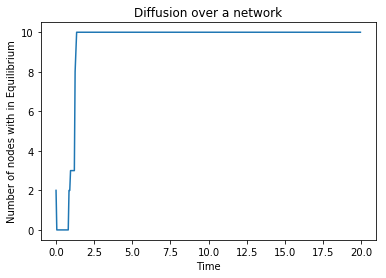

True

In [29]:
#star network

x_vals = [0.1,0.2,0.3,0.4]
T = 20
s = 0.05

G = nx.Graph()
edgelst=[(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)]
G.add_edges_from(edgelst)
phi_0 = [3,0.0,8,0,5,2,0,0.0,0,2] 

diffusion(G,phi_0,T,s,x_vals)

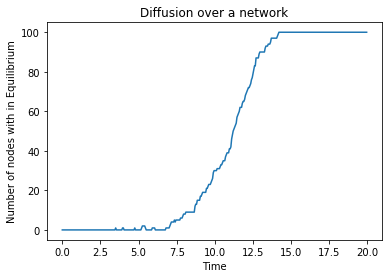

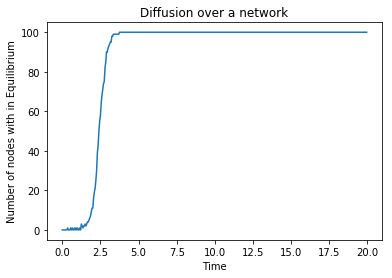

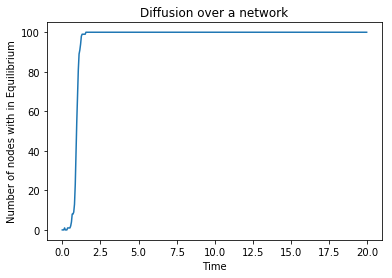

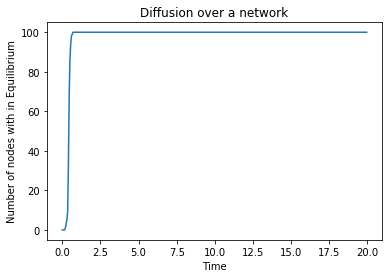

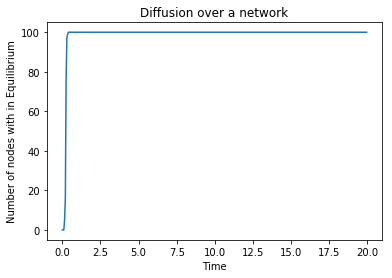

True

In [12]:
import networkx as nx
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
from pylab import *
import random


def diffusion(G,phi_0,T,s,x_vals):

    def nodes_connected(G,u, v):
        return u in G.neighbors(v)

    def generalisedLapMatrix(G,x):
        nodelist = nx.nodes(G)
        nsize = len(nodelist)
        mp    = np.zeros(shape=(nsize,nsize))
        for n in nodelist:
            c = 0   
            i = nodelist.index(n)
            j = i+1
            for m in nodelist[j:]:
                if(nodes_connected(G,n,m)):
                    mp[i,j]= mp[j,i] = -1
                else:
                    s   = nx.shortest_path_length(G, source=n,target=m)
                    val = (s*pow(x,(s-1)))
                    mp[i,j]= mp[j,i]= -val
                j= j+1
            mp[i,i] =  -1*(mp[i].sum())
            i = 0
        return mp

    matrix_lst = []
    L  = nx.laplacian_matrix(G).todense()

    matrix_lst.append(L)
    for x in x_vals:
        l = generalisedLapMatrix(G,x)
        matrix_lst.append(l)

    avg = np.average(phi_0)

    val=[]
    p=0
    for l_x in matrix_lst:
        c_list =[]
        for t in np.arange(0,T,s):
            c = 0
            phi_t = np.dot(phi_0, expm(-l_x*t*1))
            for n in phi_t:
                if(avg-0.0001<= n <= avg+0.0001):
                    c= c+1
            c_list.append(c)
        val.append(c_list)
        plt.plot(np.arange(0,T,s), c_list) 
        plt.title("Diffusion over a network")
        plt.xlabel("Time")
        plt.ylabel("Number of nodes with in Equilibrium")
        plt.show()
    return True

x_vals = [0.1,0.2,0.3,0.4]
name = 'Barabasi'
T = 20
s = 0.05
n = 100
G = nx.barabasi_albert_graph(n, 2, seed=1)
L = nx.laplacian_matrix(G).todense()
phi_0 = []
for l in range(0,100):
    phi_0.append(random.randint(0, 10))

diffusion(G,phi_0,T,s,x_vals)
    

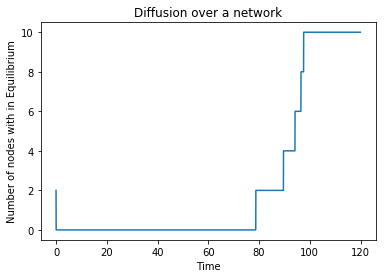

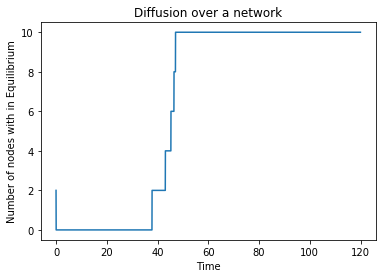

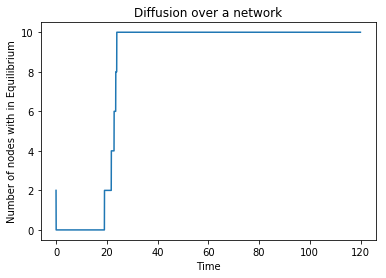

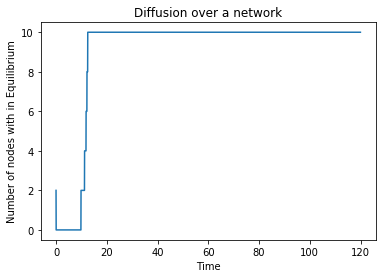

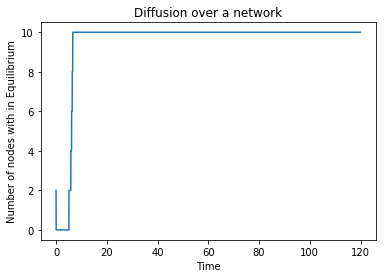

True

In [13]:
#path network

x_vals = [0.1,0.2,0.3,0.4]
T = 120
s = 0.05

G = nx.Graph()
edgelst=[(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10)]
G.add_edges_from(edgelst)
phi_0 = [3,0.0,8,0,5,2,0,0.0,0,2] 

diffusion(G,phi_0,T,s,x_vals)

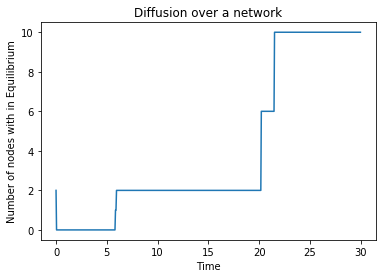

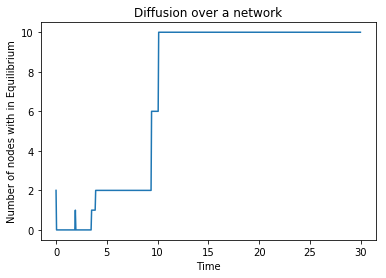

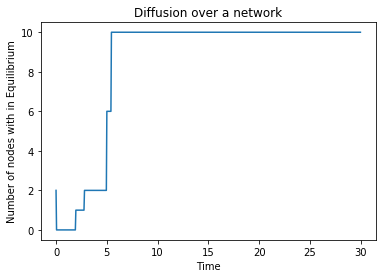

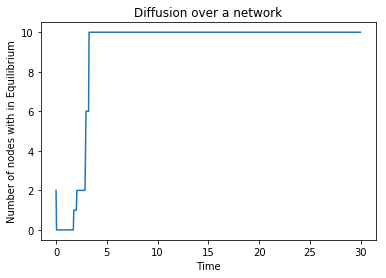

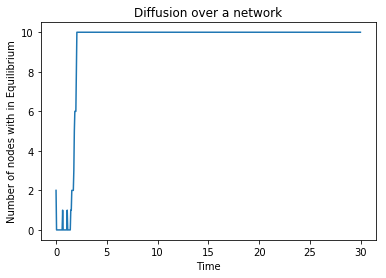

True

In [17]:
#lattice network

x_vals = [0.1,0.2,0.3,0.4]
T = 30
s = 0.05

G     = nx.Graph()
elst  = [(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(4,7),(7,8),(3,8),(8,9),(2,9),(9,10),(10,1)]
G.add_edges_from(elst)
phi_0 = [3,0.0,8,0,5,2,0,0.0,0,2] 

diffusion(G,phi_0,T,s,x_vals)

/usr/lib/python3/dist-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/lib/python3/dist-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/lib/python3/dist-packages/matplotlib/__init__.py:919: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/lib/python3/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


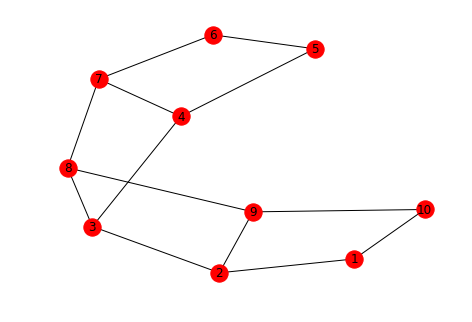

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

#G = nx.Graph()
#edgelst=[(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10)]
#G.add_edges_from(edgelst)
#G = nx.path_graph(10)
#G = nx.barabasi_albert_graph(100, 2, seed=1)
#nx.draw(G)
#savefig('barabasi.png')

#G = nx.Graph()
#edgelst=[(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)]
#G.add_edges_from(edgelst)grid_graph(dim, periodic=False)

#G   = nx.grid_graph(dim=[2,5])
#pos = nx.spring_layout(G)
#nx.draw(G,pos, with_labels = True)
#plt.show()


G = nx.Graph()
edgelst=[(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(4,7),(7,8),(3,8),(8,9),(2,9),(9,10),(10,1)]
G.add_edges_from(edgelst)
pos = nx.spring_layout(G)
nx.draw(G,pos, with_labels = True)
plt.show()